#Stock prediction using Artificial Neural Networks

The IBM stock dataset is the historical data from the finance column of Yahoo website.

Link: https://in.finance.yahoo.com/quote/IBM/history?p=IBM 

##Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [4]:
dataset = pd.read_csv("IBM.csv")

In [5]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-06-18,113.980003,115.440002,113.309998,114.269997,71.508987,5182800
1,2001-06-19,116.260002,117.250000,114.559998,114.839996,71.865692,6152800
2,2001-06-20,113.500000,114.989998,111.760002,113.089996,70.770576,8828300
3,2001-06-21,112.150002,114.699997,111.360001,112.599998,70.463913,8155800
4,2001-06-22,112.599998,114.430000,112.500000,112.870003,70.632889,5607200


##Visualising dataset

In [6]:
dataset.shape

(5030, 7)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5030 entries, 0 to 5029
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5030 non-null   object 
 1   Open       5030 non-null   float64
 2   High       5030 non-null   float64
 3   Low        5030 non-null   float64
 4   Close      5030 non-null   float64
 5   Adj Close  5030 non-null   float64
 6   Volume     5030 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 275.2+ KB


In [8]:
dataset.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

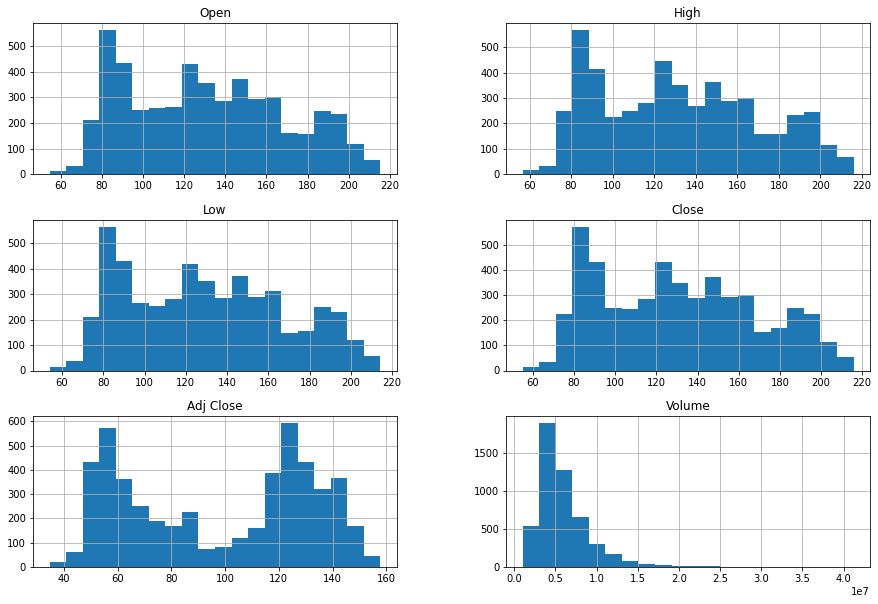

In [9]:
dataset.hist(bins=20,figsize=(15,10));

##Splitting test and training data

In [10]:
training_data = dataset[0:3500]
test_data = dataset[3500:]

##Preprocessing

In [11]:
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-06-18,113.980003,115.440002,113.309998,114.269997,71.508987,5182800
1,2001-06-19,116.260002,117.250000,114.559998,114.839996,71.865692,6152800
2,2001-06-20,113.500000,114.989998,111.760002,113.089996,70.770576,8828300
3,2001-06-21,112.150002,114.699997,111.360001,112.599998,70.463913,8155800
4,2001-06-22,112.599998,114.430000,112.500000,112.870003,70.632889,5607200


In [12]:
otrain=training_data.iloc[:,1:2]

In [13]:
htrain=training_data.iloc[:,2:3]

In [14]:
ltrain=training_data.iloc[:,3:4]

In [15]:
ctrain=training_data.iloc[:,4:5]

In [16]:
mm = MinMaxScaler(feature_range=(0,1))
otrain=mm.fit_transform(otrain)
htrain=mm.fit_transform(htrain)
ltrain=mm.fit_transform(ltrain)
ctrain=mm.fit_transform(ctrain)

In [17]:
htrain.shape

(3500, 1)

In [20]:
xh_train=htrain[0:3499]
yh_train=htrain[1:3500]

In [21]:
xh_train.shape

(3499, 1)

In [22]:
xh_train=np.reshape(xh_train,(3499,1,1))

In [23]:
xl_train=np.reshape(ltrain[0:3499],(3499,1,1))
yl_train=ltrain[1:4500]

In [24]:
xc_train=np.reshape(ctrain[0:3499],(3499,1,1))
yc_train=ctrain[1:3500]

In [25]:
#putting it all together
def preprocess(dataset):
  odata=dataset.iloc[:,1:2]      #extracting open attribute
  hdata=dataset.iloc[:,2:3]      #extracting high attribute
  ldata=dataset.iloc[:,3:4]      #extracting low attribute
  cdata=dataset.iloc[:,4:5]      #extracting close attribute

  mm = MinMaxScaler(feature_range=(0,1))
  odata=mm.fit_transform(odata)
  hdata=mm.fit_transform(hdata)             #adjusting the range to [0,1]
  ldata=mm.fit_transform(ldata)
  cdata=mm.fit_transform(cdata)

  n = hdata.shape[0]

  xo_data=np.reshape(odata[0:n-1],(n-1,1,1))
  yo_data=odata[1:n]

  xh_data=np.reshape(hdata[0:n-1],(n-1,1,1))
  yh_data=hdata[1:n]

  xl_data=np.reshape(ldata[0:n-1],(n-1,1,1))
  yl_data=ldata[1:n]

  xc_data=np.reshape(cdata[0:n-1],(n-1,1,1))
  yc_data=cdata[1:n]

  return xo_data,yo_data,xh_data,yh_data,xl_data,yl_data,xc_data,yc_data

In [26]:
xo_train,yo_train,xh_train,yh_train,xl_train,yl_train,xc_train,yc_train = preprocess(training_data)

##Model

###High feature

In [27]:
hmodel = Sequential()

hmodel.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
hmodel.add(Dense(units = 1))
hmodel.compile(optimizer = 'adam', loss = 'mean_squared_error')


hmodel.fit(xh_train, yh_train, batch_size = 32, epochs = 200)

Epoch 1/200
110/110 [==============================] - 22s 2ms/step - loss: 0.4083
Epoch 2/200
110/110 [==============================] - 0s 2ms/step - loss: 0.1975
Epoch 3/200
110/110 [==============================] - 0s 2ms/step - loss: 0.1091
Epoch 4/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0804
Epoch 5/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0737
Epoch 6/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0706
Epoch 7/200
110/110 [==============================] - 0s 1ms/step - loss: 0.0677
Epoch 8/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 9/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0628
Epoch 10/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 11/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0587
Epoch 12/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0562
Epoch 13/200

In [28]:
real_high_price = test_data.iloc[:,2:3].reset_index()
real_high_price.drop("index",axis=1,inplace=True)
real_high_price.head(2)

,High
0,173.750000
1,174.440002


In [29]:
inputs = real_high_price
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (real_high_price.shape[0], 1, 1))

predicted_high_price = hmodel.predict(inputs)
predicted_high_price = mm.inverse_transform(predicted_high_price)

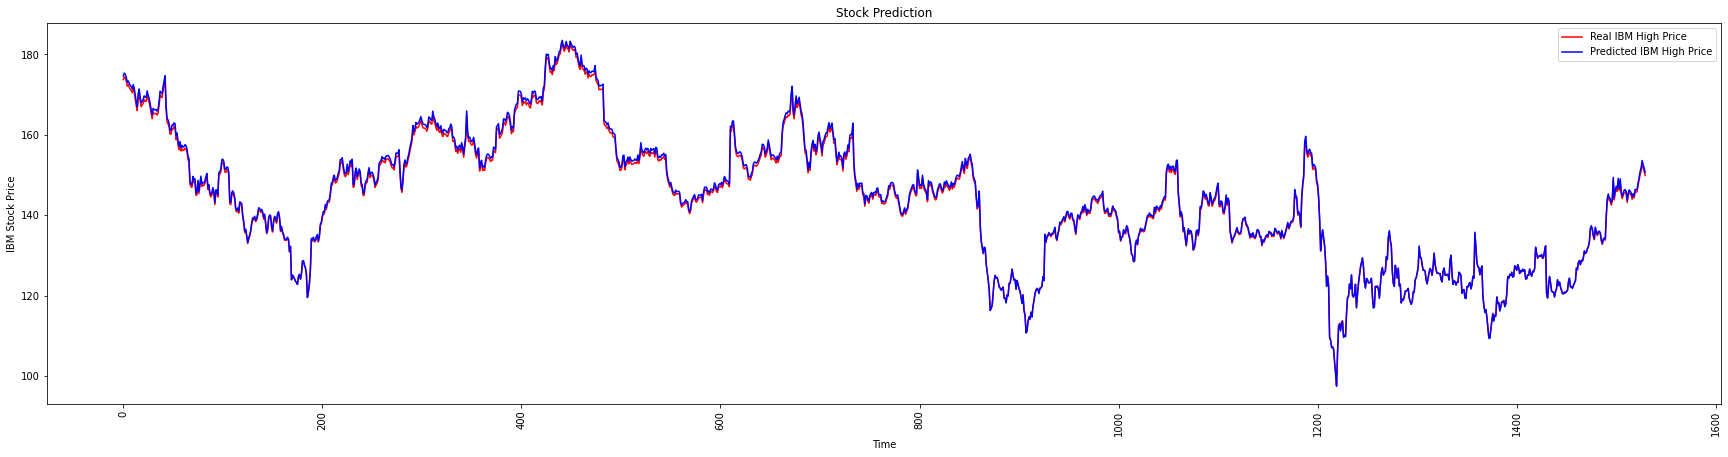

In [30]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(7)
plt.xticks(rotation=90)
plt.plot(real_high_price, color = 'red', label = 'Real IBM High Price' )
plt.plot(predicted_high_price, color = 'blue', label = 'Predicted IBM High Price' )
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

In [31]:
mean_squared_error(real_high_price,predicted_high_price),np.sqrt(mean_absolute_error(real_high_price,predicted_high_price))

(0.37858032427680227, 0.7292100000595418)

In [ ]:
hmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hmodel.save("highIBM.h5")

###Low feature

In [32]:
lmodel = Sequential()

lmodel.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
lmodel.add(Dense(units = 1))
lmodel.compile(optimizer = 'adam', loss = 'mean_squared_error')


lmodel.fit(xl_train, yl_train, batch_size = 32, epochs = 200)

Epoch 1/200
110/110 [==============================] - 2s 2ms/step - loss: 0.2704
Epoch 2/200
110/110 [==============================] - 0s 2ms/step - loss: 0.1233
Epoch 3/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0750
Epoch 4/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 5/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0620
Epoch 6/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0598
Epoch 7/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0580
Epoch 8/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 9/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 10/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0496
Epoch 11/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0456
Epoch 12/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0429
Epoch 13/200


In [33]:
real_low_price = test_data.iloc[:,3:4].reset_index()
real_low_price.drop("index",axis=1,inplace=True)
real_low_price.head(2)

,Low
0,171.929993
1,172.460007


In [34]:
inputs = real_low_price
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (real_low_price.shape[0], 1, 1))

predicted_low_price = lmodel.predict(inputs)
predicted_low_price = mm.inverse_transform(predicted_low_price)

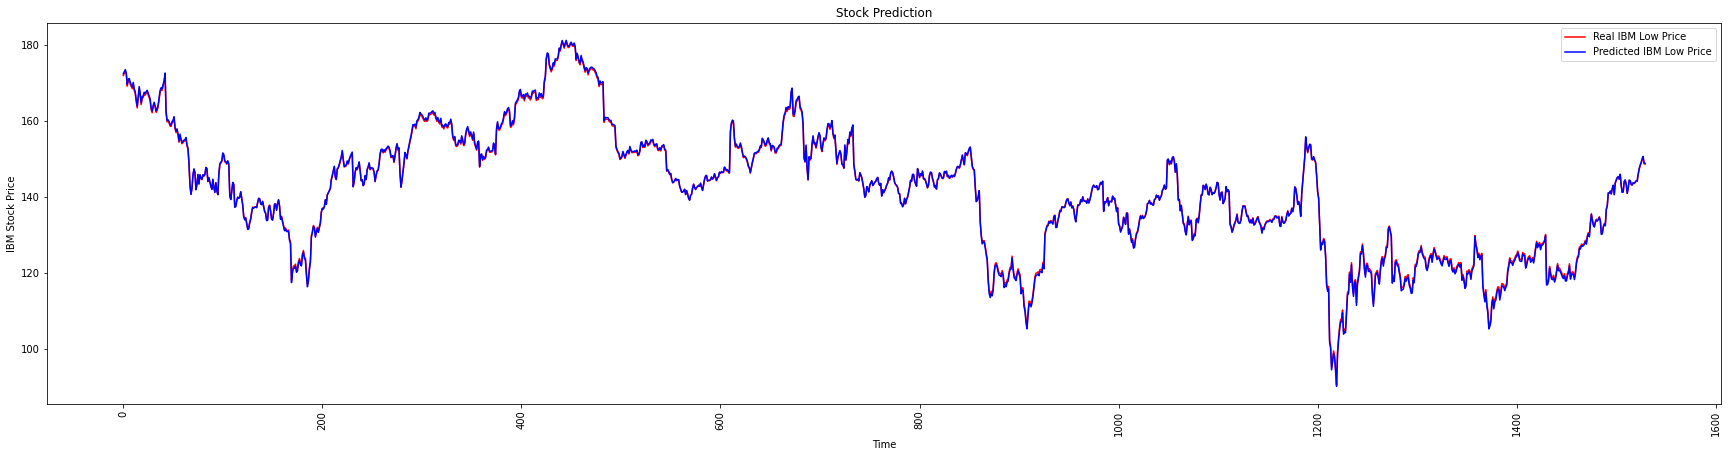

In [35]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(7)
plt.xticks(rotation=90)
plt.plot(real_low_price, color = 'red', label = 'Real IBM Low Price' )
plt.plot(predicted_low_price, color = 'blue', label = 'Predicted IBM Low Price' )
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

In [36]:
mean_squared_error(real_low_price,predicted_low_price),np.sqrt(mean_absolute_error(real_low_price,predicted_low_price))

(0.12460939102247261, 0.5469279679609611)

In [ ]:
lmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lmodel.save("lowIBM.h5")

###Close Feature

In [37]:
cmodel = Sequential()

cmodel.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
cmodel.add(Dense(units = 1))
cmodel.compile(optimizer = 'adam', loss = 'mean_squared_error')


cmodel.fit(xc_train, yc_train, batch_size = 32, epochs = 200)

Epoch 1/200
110/110 [==============================] - 2s 2ms/step - loss: 0.4071
Epoch 2/200
110/110 [==============================] - 0s 2ms/step - loss: 0.1730
Epoch 3/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0816
Epoch 4/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 5/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 6/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0502
Epoch 7/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0485
Epoch 8/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0453
Epoch 9/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0425
Epoch 10/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 11/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 12/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0335
Epoch 13/200


In [38]:
real_close_price = test_data.iloc[:,4:5].reset_index()
real_close_price.drop("index",axis=1,inplace=True)
real_close_price.head(2)

,Close
0,173.479996
1,173.759995


In [39]:
inputs = real_close_price
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (real_close_price.shape[0], 1, 1))

predicted_close_price = cmodel.predict(inputs)
predicted_close_price = mm.inverse_transform(predicted_close_price)

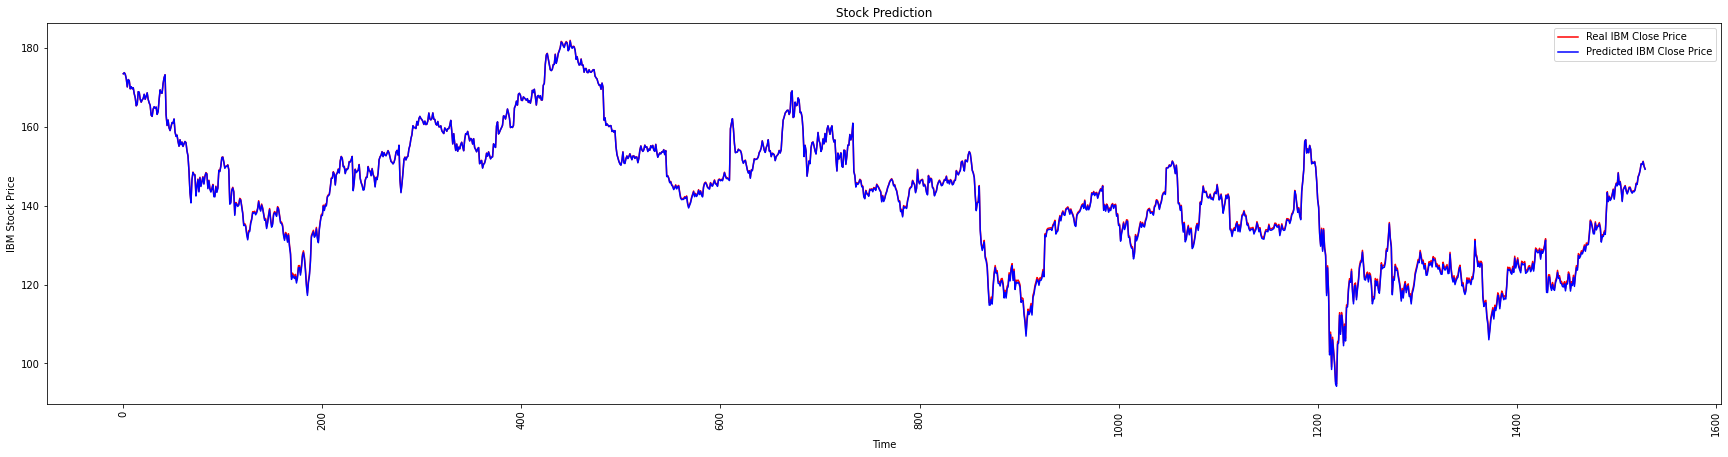

In [40]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(7)
plt.xticks(rotation=90)
plt.plot(real_close_price, color = 'red', label = 'Real IBM Close Price' )
plt.plot(predicted_close_price, color = 'blue', label = 'Predicted IBM Close Price' )
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

In [41]:
mean_squared_error(real_close_price,predicted_close_price),np.sqrt(mean_absolute_error(real_close_price,predicted_close_price))

(0.09701237366278594, 0.49318733760039196)

In [ ]:
cmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cmodel.save("closeIBM.h5")

###Open feature

In [42]:
omodel = Sequential()

omodel.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
omodel.add(Dense(units = 1))
omodel.compile(optimizer = 'adam', loss = 'mean_squared_error')

omodel.fit(xo_train, yo_train, batch_size = 32, epochs = 200)

Epoch 1/200
110/110 [==============================] - 2s 2ms/step - loss: 1.5168
Epoch 2/200
110/110 [==============================] - 0s 2ms/step - loss: 0.9569
Epoch 3/200
110/110 [==============================] - 0s 2ms/step - loss: 0.5949
Epoch 4/200
110/110 [==============================] - 0s 2ms/step - loss: 0.3797
Epoch 5/200
110/110 [==============================] - 0s 2ms/step - loss: 0.2575
Epoch 6/200
110/110 [==============================] - 0s 2ms/step - loss: 0.1743
Epoch 7/200
110/110 [==============================] - 0s 2ms/step - loss: 0.1244
Epoch 8/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0912
Epoch 9/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0821
Epoch 10/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0705
Epoch 11/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 12/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 13/200


In [43]:
real_open_price = test_data.iloc[:,1:2].reset_index()
real_open_price.drop("index",axis=1,inplace=True)
real_open_price.head(2)

,Open
0,172.970001
1,173.330002


In [44]:
inputs = real_open_price
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (real_open_price.shape[0], 1, 1))

predicted_open_price = omodel.predict(inputs)
predicted_open_price = mm.inverse_transform(predicted_open_price)

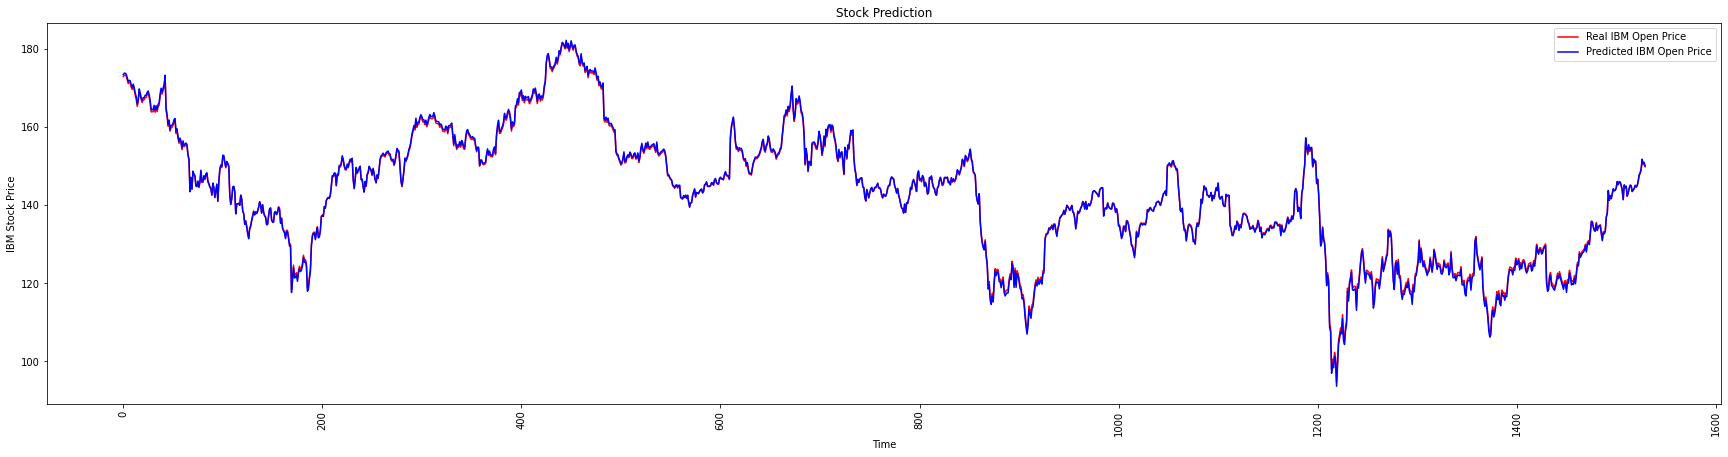

In [45]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(7)
plt.xticks(rotation=90)
plt.plot(real_open_price, color = 'red', label = 'Real IBM Open Price' )
plt.plot(predicted_open_price, color = 'blue', label = 'Predicted IBM Open Price' )
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

In [46]:
mean_squared_error(real_open_price,predicted_open_price),np.sqrt(mean_absolute_error(real_open_price,predicted_open_price))

(0.20416784829901755, 0.6194682480475622)

In [ ]:
omodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
omodel.save("openIBM.h5")